# IVDA Group 10 - Ikealytics 
## Group Assignment 2 - Coding Response

- Michael Sigg 18-618-843
- Noah Croes 24-738-759
- Leon Keutzer 24-736-001
- Jasur Fayzullaev 23-748-973

---

- Link to Github: [IVDA_G10](https://github.com/noah18c/IVDA_G10)
- Link to Data Source: [Kaggle](https://www.kaggle.com/datasets/ahmedkallam/ikea-sa-furniture-web-scraping/data)

---

### 1. Team Contributions:

### 2. Task List:



In [188]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [189]:
# import data
data_path = "IKEA_SA_Furniture_Web_Scrapings_sss.csv"
df = pd.read_csv(data_path, index_col=0)

### 3. Data Characterization 

#### 3.1 Data Types and Distributions

In [190]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [191]:
df.describe()

,item_id,price,depth,height,width
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


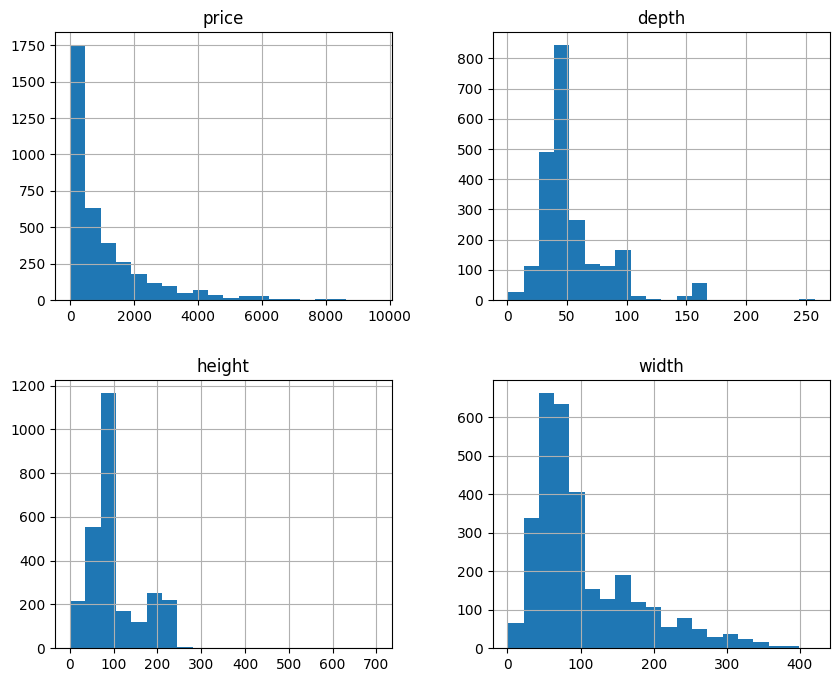

In [192]:
# Histograms for numerical attributes
df[['price', 'old_price', 'depth', 'height', 'width']].hist(bins=20, figsize=(10, 8))
plt.show()

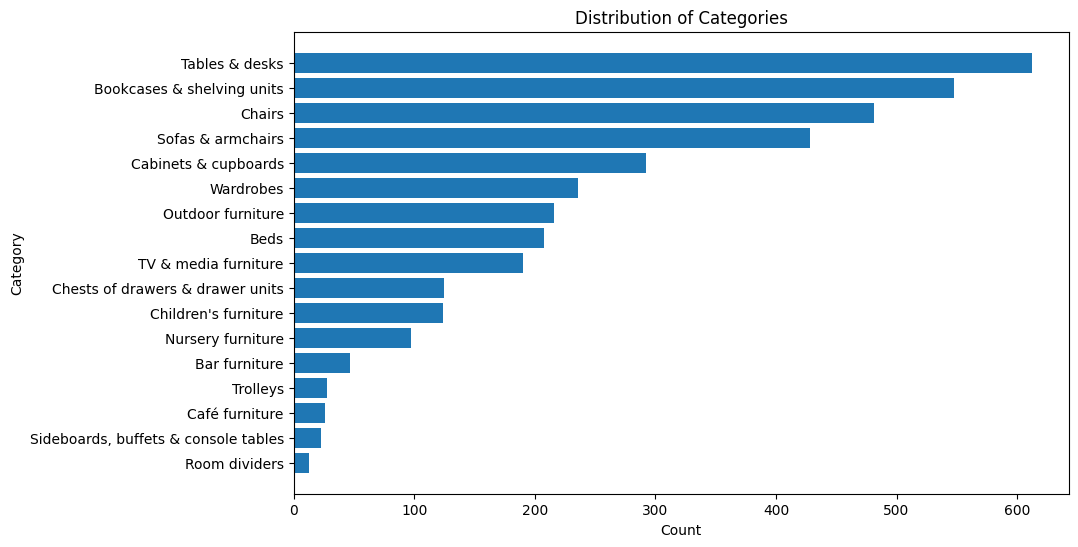

In [193]:
category_counts = df['category'].value_counts()

# Plot horizontal bar chart for category distribution
plt.figure(figsize=(10, 6))
plt.barh(category_counts.index, category_counts.values)
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Distribution of Categories")
plt.gca().invert_yaxis()
plt.show()

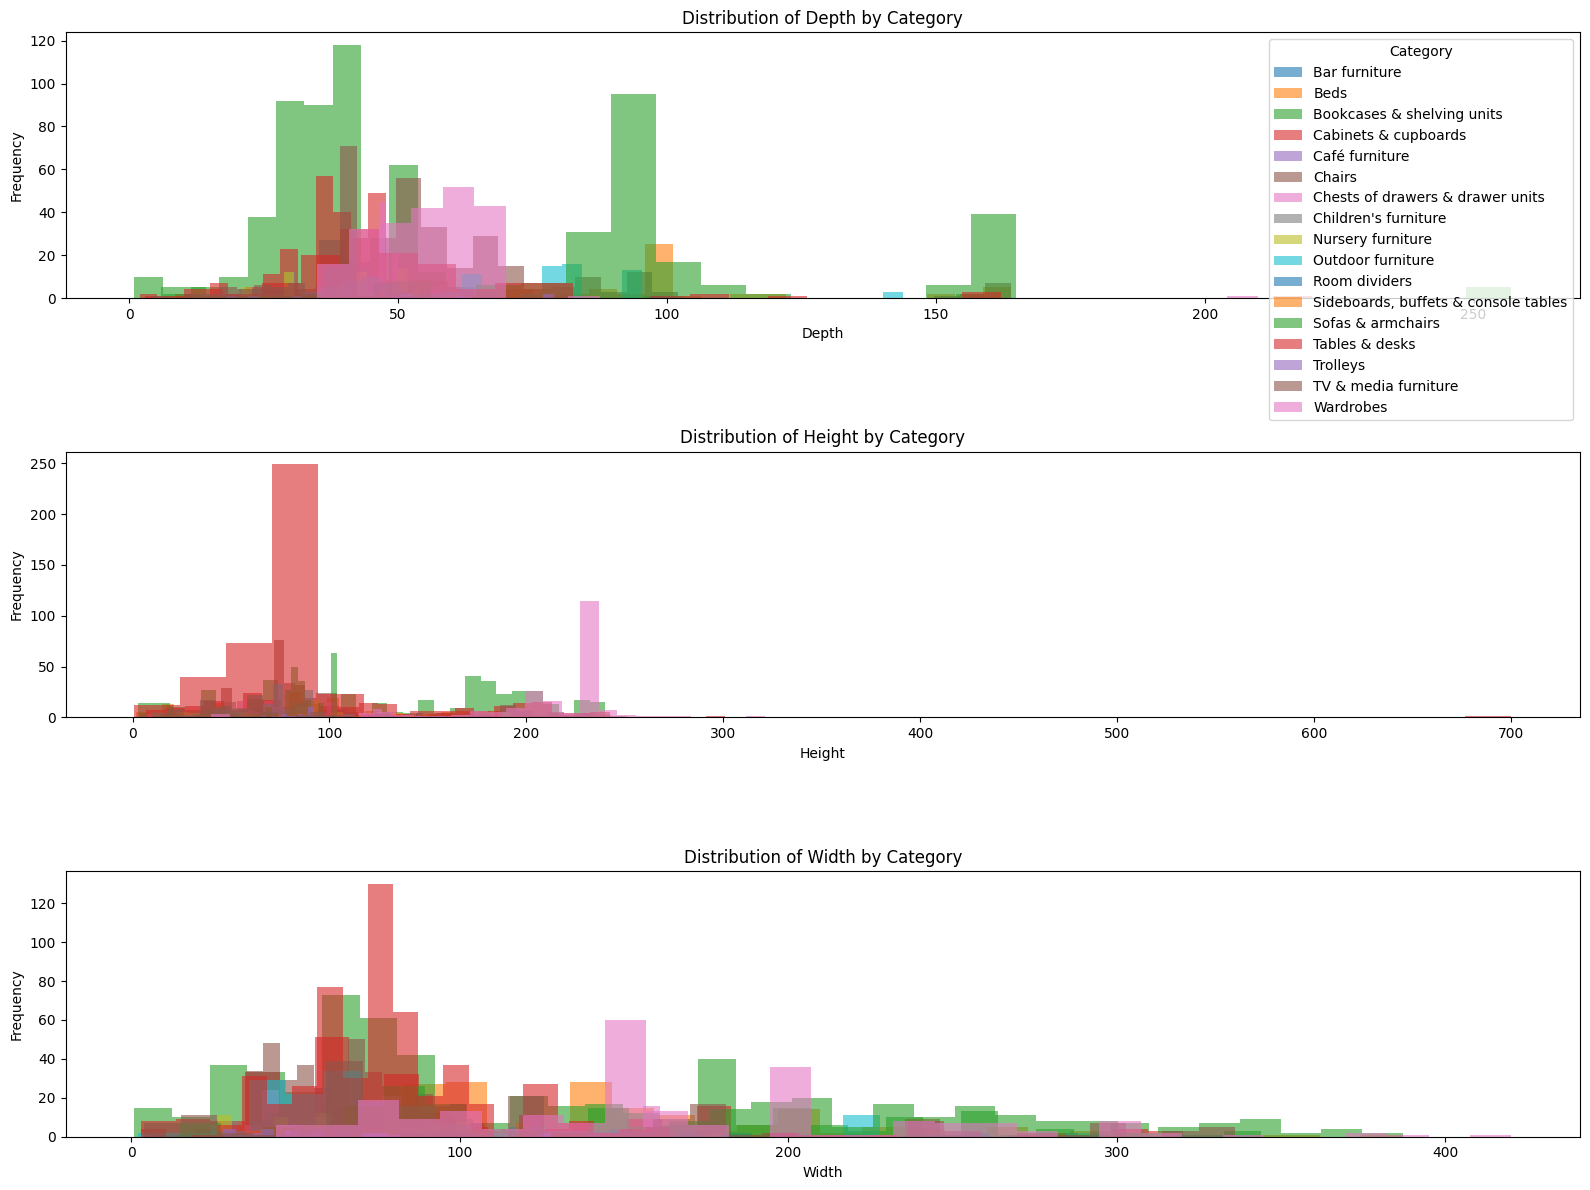

In [194]:
# Define the dimensions to plot
dimensions = ['depth', 'height', 'width']

# Set figure size and layout
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=False)

# Loop over dimensions and plot a stacked histogram for each
for i, dim in enumerate(dimensions):
    # Filter out NaN values for the current dimension
    data = df[['category', dim]].dropna()

    # Get unique categories
    categories = data['category'].unique()

    # Plot histograms for each category in a stacked manner
    for category in categories:
        category_data = data[data['category'] == category][dim]
        axes[i].hist(category_data, bins=30, alpha=0.6, label=category, stacked=True)

    # Set titles and labels
    axes[i].set_title(f'Distribution of {dim.capitalize()} by Category')
    axes[i].set_xlabel(dim.capitalize())
    axes[i].set_ylabel('Frequency')

# Add a legend to the first axis (showing categories)
axes[0].legend(title="Category", loc="upper right")
plt.tight_layout()
plt.show()

#### 3.2 Data Quality

In [195]:
# Amount of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              2231 non-null   float64
 11  height             2706 non-null   float64
 12  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [196]:
df_noNaN = df.dropna()
df_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, 3 to 3688
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            1899 non-null   int64  
 1   name               1899 non-null   object 
 2   category           1899 non-null   object 
 3   price              1899 non-null   float64
 4   old_price          1899 non-null   object 
 5   sellable_online    1899 non-null   bool   
 6   link               1899 non-null   object 
 7   other_colors       1899 non-null   object 
 8   short_description  1899 non-null   object 
 9   designer           1899 non-null   object 
 10  depth              1899 non-null   float64
 11  height             1899 non-null   float64
 12  width              1899 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 194.7+ KB


- Dropping all of the NaNs leads to a significant reduction in the number of observations
- Try to impute them later, by using the categorical mean or median

#### Extreme Values / Outliers

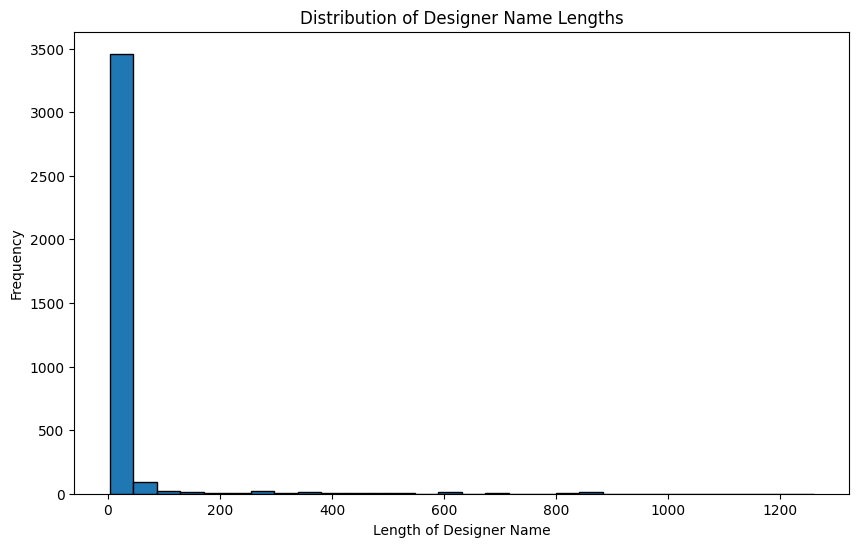

In [197]:
# Calculate the length of each entry in the 'designer' column
designer_lengths = df['designer'].str.len()

# Plot the distribution of designer name lengths
plt.figure(figsize=(10, 6))
plt.hist(designer_lengths, bins=30, edgecolor='black')
plt.xlabel("Length of Designer Name")
plt.ylabel("Frequency")
plt.title("Distribution of Designer Name Lengths")
plt.show()

In [198]:
# example of designer attribute issue
df[(df['designer'].str.len() > 1200)]['designer']

2206    104.246.21 KNOPPARP sofa is very durable thank...
Name: designer, dtype: object

- Key issue with designer attribute: Some contain descriptions of the items and not just designer names
- Manual inspect shows that the longest actual designer has a length of < 65 (multiple designers) and also that there don't seem to be any descriptions with a length shorter than 65. So 65 is a good threshold

In [199]:
df[(df['designer'].str.len() > 60) & (df['designer'].str.len() < 65)]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2516,9277782,VALLENTUNA,Sofas & armchairs,4448.0,"SR 5,560",True,https://www.ikea.com/sa/en/p/vallentuna-3-seat...,Yes,3-seat modular sofa with sofa-bed,IKEA of Sweden/Fredriksson/L Löwenhielm/Hillan...,NaN,84.0,266.0


In [200]:
# drop the rows with descriptions instead of designers
df = df[(df['designer'].str.len() < 65)] 

In [201]:
category_counts = df['designer'].value_counts()
category_counts

designer
IKEA of Sweden                                        828
Ehlén Johansson                                       161
Francis Cayouette                                     151
Ola Wihlborg                                          134
K Hagberg/M Hagberg                                   122
                                                     ... 
Henrik Preutz/Olle Lundberg                             1
IKEA of Sweden/Nike Karlsson/Eva Lilja Löwenhielm       1
Nike Karlsson/IKEA of Sweden/Eva Lilja Löwenhielm       1
Nike Karlsson/IKEA of Sweden                            1
IKEA of Sweden/Ehlén Johansson/Andreas Fredriksson      1
Name: count, Length: 281, dtype: int64

- QUESTION: How should we treat those rows with multiple designer? Likely split them up? And then later we one-hot encode them for the model?

In [202]:
# Inspect the height outliers
df[df['height']>300]

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
856,79291355,PLATSA,Cabinets & cupboards,1268.0,"SR 1,505",True,https://www.ikea.com/sa/en/p/platsa-storage-co...,No,"Storage combination, 80x42x30...",IKEA of Sweden,42.0,301.0,80.0
2884,80278273,HILVER,Tables & desks,100.0,No old price,True,https://www.ikea.com/sa/en/p/hilver-leg-cone-s...,No,"Leg cone-shaped, 70 cm",Chenyi Ke,NaN,700.0,NaN
3667,19305534,PLATSA,Wardrobes,1785.5,"SR 2,235",True,https://www.ikea.com/sa/en/p/platsa-wardrobe-w...,No,"Wardrobe with 5 doors+3 drawers, ...",Ola Wihlborg/IKEA of Sweden,42.0,321.0,NaN


In [203]:
# printing the whole description
for desc in df[df['height'] == 301.0]['short_description']:
    print(desc)
for desc in df[df['height'] == 321.0]['short_description']:
    print(desc)

        Storage combination,          80x42x301 cm
        Wardrobe with 5 doors+3 drawers,          175-205x42x321 cm


In [204]:
# cabinet and warderobe seem reasonable
# the table is a mistake, the description states 70cm 
df.loc[df['height'] == 700, 'height'] = 70

In [205]:
# inspect depth outlier 
df[df['depth']>200]
# seems reasonable 

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
2283,69254810,GRÖNLID,Sofas & armchairs,6575.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson/Francis Cayouette,252.0,104.0,327.0
2289,59193723,KIVIK,Sofas & armchairs,8295.0,No old price,True,https://www.ikea.com/sa/en/p/kivik-u-shaped-so...,Yes,"U-shaped sofa, 7-seat",Ola Wihlborg,257.0,83.0,368.0
2385,49252949,KIVIK,Sofas & armchairs,6895.0,No old price,True,https://www.ikea.com/sa/en/p/kivik-u-shaped-so...,Yes,"U-shaped sofa, 6 seat",Ola Wihlborg,257.0,83.0,328.0
2387,69285294,VIMLE,Sofas & armchairs,8395.0,No old price,True,https://www.ikea.com/sa/en/p/vimle-u-shaped-so...,Yes,"U-shaped sofa, 6 seat",Ehlén Johansson,249.0,83.0,327.0
2559,89256610,GRÖNLID,Sofas & armchairs,8900.0,No old price,True,https://www.ikea.com/sa/en/p/groenlid-u-shaped...,No,"U-shaped sofa, 6 seat",Francis Cayouette,252.0,104.0,327.0
3178,19046574,BEKANT,Tables & desks,5300.0,No old price,True,https://www.ikea.com/sa/en/p/bekant-desk-combi...,Yes,"Desk combination, 320x220 cm",K Malmvall/E Lilja Löwenhielm,220.0,NaN,NaN
3484,19300107,PAX,Wardrobes,5380.0,No old price,True,https://www.ikea.com/sa/en/p/pax-wardrobe-whit...,No,"Wardrobe, 276x211x236 cm",IKEA of Sweden/Ehlén Johansson,210.0,236.0,275.0


In [206]:
# check for duplicates 

duplicates = df[df['item_id'].duplicated(keep=False)]  # `keep=False` keeps all duplicates
duplicates = duplicates.sort_values(by='item_id')
duplicates

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
1918,91415,TROFAST,Nursery furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
1834,91415,TROFAST,Children's furniture,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",Studio Copenhagen,NaN,NaN,28.0
2560,102065,LYCKSELE LÖVÅS,Sofas & armchairs,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
151,102065,LYCKSELE LÖVÅS,Beds,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",IKEA of Sweden,NaN,NaN,NaN
2687,105064,LIATORP,Tables & desks,445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,No,"Console table, 133x37 cm",Carina Bengs,NaN,75.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,99323614,SMÅGÖRA,Nursery furniture,370.0,No old price,True,https://www.ikea.com/sa/en/p/smagoera-changing...,No,Changing tbl/bookshelf w 1 shlf ut,IKEA of Sweden,40.0,91.0,60.0
29,99323925,STENSELE,Bar furniture,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
3028,99323925,STENSELE,Tables & desks,550.0,No old price,True,https://www.ikea.com/sa/en/p/stensele-bar-tabl...,No,"Bar table, 70x70 cm",Maja Ganszyniec,NaN,104.0,70.0
2737,99902661,VITTSJÖ,Tables & desks,609.0,No old price,True,https://www.ikea.com/sa/en/p/vittsjoe-shelving...,No,"Shelving unit with laptop table, ...",Johan Kroon,36.0,NaN,202.0


##### How do we deal with duplicates and multiple designers? 
- It seems that duplicated `item_id` values refer to items that belong to multiple categories. A possible approach could be to handle this later during one-hot encoding. After encoding the `category` attribute, we could group by the `item_id` and merge rows, ensuring that each item is marked for all relevant categories.
- This approach could also address the issue of items with multiple designers. First, we would split the `designer` attribute into a list of designers, then use `explode()` to expand the dataset so that each designer has its own row. After one-hot encoding and merging by `item_id`, each item would have a `1` for every designer associated with it
- The question is do we even want to use one-hot encoding. It would increase the feature space a lot (+17 categories and +111 unique designers). If not we'd have to make other decisions on how to handle the duplicate `item_id` and the multi-valued `designer` attributes

In [207]:
# sample code on how to split up the designer attribute and 'explode' the dataset
test = df.copy()
test['designer'] = test['designer'].str.split('/')
test = test.explode('designer').reset_index(drop=True)

# how to one-hot encode
test_one_hot = pd.get_dummies(test, columns=['category', 'designer'])

# groupy by item_id and merge
test_one_hot_merged = test_one_hot.groupby('item_id').agg('max').reset_index()

#### 3.3 Information on our goals

Based on user selected items, we will use a KNN approach to find and recommend similar items. The recommendations will be visualized with comparisons on attributes like prices and dimensions, helping users quickly identify suitable products.

**Data Preparation Steps:**

1. **Impute Missing Values**: Missing values in `depth`, `width` and `height` will be imputed within each category, using the median to adress skewness
2. **Addressing Skewness**: Due to a right-skewed distribution, particularly in prices, we'll apply appropriate transformations (likely log) to price and dimensions, followed by scaling, to improve KNN performance in distance-based similarity.
3. **Encoding Categorical Attributes**: Categorical features, like `category` and `designer`, will be encoded to ensure compatibility with KNN.
4. **Balancing Categories**: To mitigate bias toward overrepresented categories, we'll consider a weighted KNN approach or sampling techniques for balance. --------> We actually don't care for this since we're not computing weights and predicting values, but computing similarities of features and then returning top 5?? or so products.

### 4. Implementation of data preparation goals

#### 4.1 Visualizing the wrangling process

# TODO
- Do something with duplicate values: some instances are intrinsically the same, what to do with them? We cannot use them for proper recommendations.
- Do something with missing values

Your output should just be a dataframe that the model can use.

##### 4.1.1 Adressing the duplicates

Apply one-hot encoding to the 'category' and 'designer' columns. This encoding allows us to include these categorical features in the KNN model, making designers and categories usable for similarity calculations. Although this process will increase the number of columns, the added data size remains minimal, adding only a few KB, which will have negligible impact on computation time.

In [208]:
print("Duplicates before: ", df['item_id'].duplicated().sum(), " - Columns before: ",len(df.columns))

Duplicates before:  691  - Columns before:  13


In [209]:
df['designer'] = df['designer'].str.split('/')  # Split on delimiter, adjust if needed
df = df.explode('designer').reset_index(drop=True)  # Explode to separate designers
df_one_hot = pd.get_dummies(df, columns=['category', 'designer'])
df = df_one_hot.groupby('item_id').agg('max').reset_index()

Stored the newly created column names in two separated variables for later use

In [210]:
designer_columns = [col for col in df_one_hot.columns if col.startswith('designer_')]
category_columns = [col for col in df_one_hot.columns if col.startswith('category_')]

In [211]:
print("Duplicates after: ", df['item_id'].duplicated().sum(), " - Columns after: ",len(df.columns))

Duplicates after:  0  - Columns after:  139


In [212]:
df.head()

,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,depth,height,...,designer_T Jacobsen,designer_T Winkel,designer_Thomas Sandell,designer_Tina Christensen,designer_Tom Dixon,designer_Tord Björklund,designer_U Nordentoft,designer_Virgil Abloh,designer_W Chong,designer_Wiebke Braasch
0,58487,FLYTTA,537.0,SR 895,True,https://www.ikea.com/sa/en/p/flytta-kitchen-tr...,No,"Kitchen trolley, 98x57 cm",NaN,86.0,...,False,False,False,False,False,False,False,False,False,False
1,91415,TROFAST,5.0,No old price,True,https://www.ikea.com/sa/en/p/trofast-lid-white...,No,"Lid, 20x28 cm",NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,102065,LYCKSELE LÖVÅS,495.0,No old price,True,https://www.ikea.com/sa/en/p/lycksele-loevas-m...,No,"Mattress, 140x188 cm",NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,102452,MYDAL,795.0,No old price,True,https://www.ikea.com/sa/en/p/mydal-bunk-bed-fr...,No,"Bunk bed frame, 90x200 cm",NaN,157.0,...,False,False,False,False,False,False,False,False,False,False
4,105064,LIATORP,445.0,No old price,True,https://www.ikea.com/sa/en/p/liatorp-console-t...,No,"Console table, 133x37 cm",NaN,75.0,...,False,False,False,False,False,False,False,False,False,False


##### 4.1.2 Adressing the missing values

The only missing values in the dataset are found in the depth, height, and width columns. Since KNN relies on calculating distances between values to generate recommendations, it requires complete data in these fields. A practical solution is to impute missing values using the median of each column. This approach introduces a central, representative value, minimizing distortion in distance calculations and preserving the integrity of similarity measurements.

In [213]:
print("Missing values before:\n", df[['depth', 'height', 'width']].isnull().sum())


Missing values before:
 depth     1062
height     695
width      414
dtype: int64


In [217]:
df = df.assign(
    depth=df['depth'].fillna(df['depth'].median()),
    height=df['height'].fillna(df['height'].median()),
    width=df['width'].fillna(df['width'].median())
)
print(df['depth'].median(), df['height'].median(), df['width'].median())

47.0 84.0 81.0


In [187]:
print("Missing values after: \n", df[['depth', 'height', 'width']].isnull().sum())


Missing values after: 
 depth     0
height    0
width     0
dtype: int64


In [216]:
# Check for NaN values by column
nan_columns = df.isnull().sum()
nan_columns = nan_columns[nan_columns > 0]
if not nan_columns.empty:
    print("Columns with remaining NaN values:")
    print(nan_columns)
else:
    print("There are no remaining NaN values in any column.")


There are no remaining NaN values in any column.


#### 4.2 Visualizing the model

The idea is that the user will first select what products he or she likes using a simple interactive screen to overcome the cold-start problem. Based on that we can introduce recommendations using K-NN.

The features we will consider for classification are:
- **category**: categorical
- **price**: numerical
- **depth**: numerical
- **height**: numerical
- **width**: numerical


Reasons for not considering other potential similar features:
- **sellable_online**: Not indicative whether someone will find something a good recommendation or not. Just because someone bought a product online doesn't mean he/she won't consider buying a product in store in the future. Especially if it is to their liking.
- **other_colors**: It is entirely possible that someone will like the product a lot in the single color it comes in. It is not a good feature to include for recommendations.
- **short_description**: The variation in these descriptions is too high and the test is too short to determine an appropriate similarity, which is why we leave it out.

To address the high dimensionality, we will be adding a new feature that is based on hierarchical clustering. We will cluster products based on price and designer, and then have those clusters be the a new categorical feature **cluster**. This way we still incorporate designer into the equation. 

##### 4.2.1 Transforming data & dimensionality reduction

In [290]:
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

features = ['name','category', 'price', 'designer', 'depth', 'height', 'width']
df_model = df[features].copy()
df_model = df_model.reset_index(drop=True)
#
# df_model = df_model.reset_index()

In [291]:
# Now we will create a new feature that is based on hierarchical cluster
# We calculate the average price for each designer
designer_prices = df_model.groupby('designer')['price'].mean().reset_index()
designer_prices.columns = ['designer', 'avg_price']

We standardize the data to make sure outliers don't affect the clustering process, resulting in possible sparse clusters.

In [292]:

scaler = StandardScaler()
designer_prices['std_avg_price'] = scaler.fit_transform(designer_prices[['avg_price']])

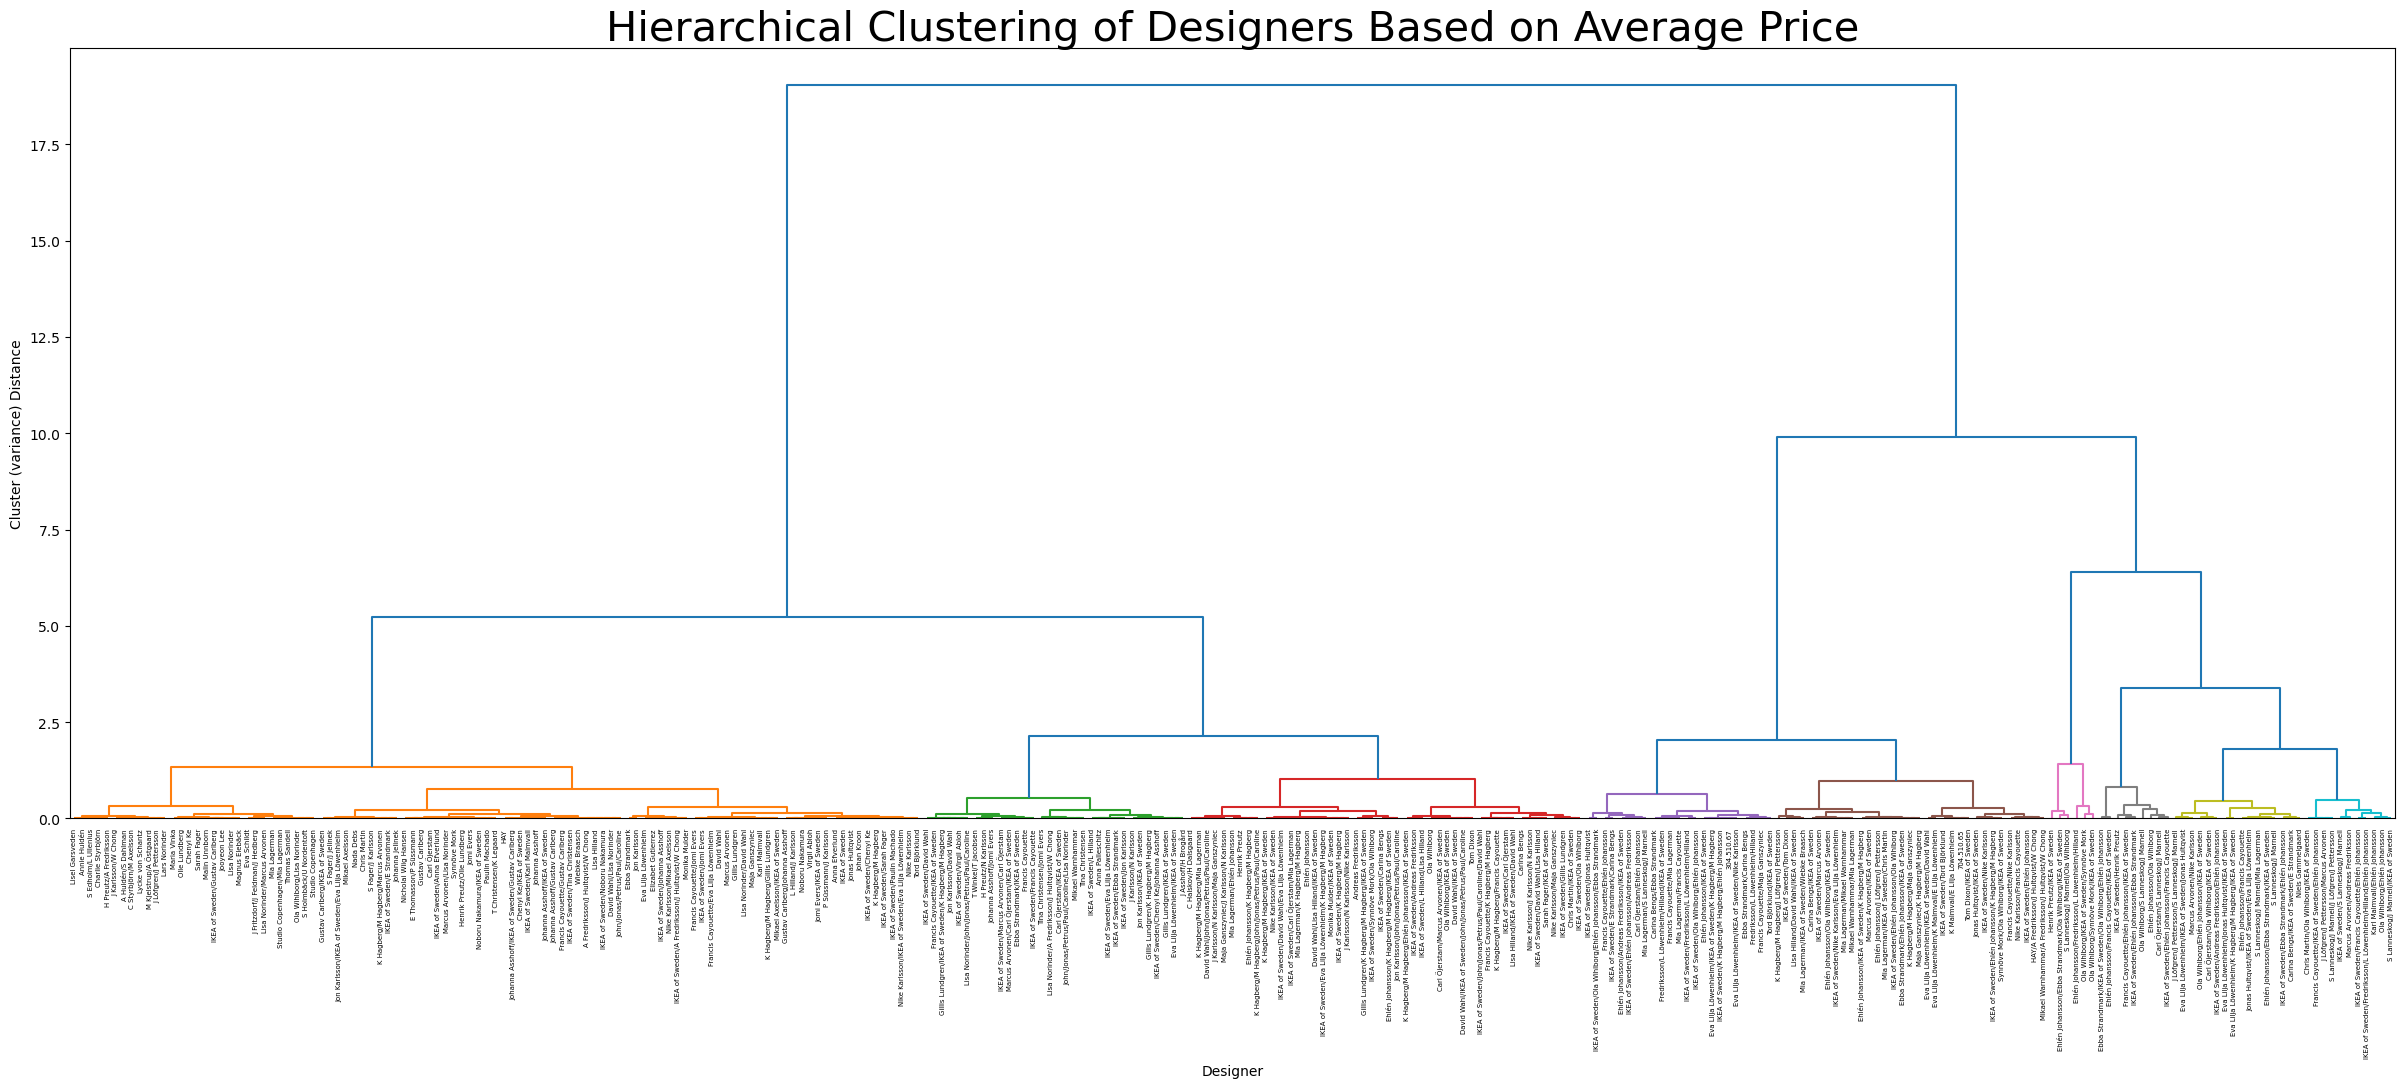

In [293]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
Z = linkage(designer_prices[['std_avg_price']], method='ward')  

# Specifying the threshold will determine where the clusters are made.
threshold = 1.5


plt.figure(figsize=(30, 10))
dendrogram(Z, labels=designer_prices['designer'].values,color_threshold=threshold)
plt.title("Hierarchical Clustering of Designers Based on Average Price",fontsize=30)
plt.xlabel("Designer")
plt.ylabel("Cluster (variance) Distance")
plt.show()

In [294]:
# we can set the threshold to determine the max distance to cut the dendogram
designer_prices['cluster'] = fcluster(Z, threshold, criterion='distance')
print('Number of clusters:',len(set(list(designer_prices['cluster']))))

Number of clusters: 9


The plot shows the hierarchical structure that we have created using ward clustering, which bases clusters on minimizing variance. By setting the threshold to 1.5 it means that the algorithm does not merge clusters if it results in an increase of variance >= 1.5 within that cluster.

Below we will show the average price within each cluster.

In [295]:
print(designer_prices.groupby(['cluster'])['avg_price'].mean())
print()
print('Counts per cluster')

cluster
1     371.770987
2     929.785675
3    1494.732308
4    2886.656094
5    2252.132593
6    7635.750000
7    5502.907407
8    3669.372396
9    4487.318182
Name: avg_price, dtype: float64

Counts per cluster


And now we will add the cluster column to the products.

In [296]:
designer_grouped = designer_prices.groupby('designer')['cluster']

df_model['cluster'] = np.NAN
for index,row in df_model.iterrows():
    df_model.loc[index,'cluster'] = designer_grouped.get_group(row['designer']).values

scaler = StandardScaler()
df_model.loc[:,['price_std', 'depth_std', 'height_std', 'width_std']] = scaler.fit_transform(df_model.loc[:,['price', 'depth', 'height', 'width']])

# TODO properly impute missing values
df_model.loc[df_model['depth_std'].isna(),'depth_std'] = 0
df_model.loc[df_model['height_std'].isna(),'height_std'] = 0
df_model.loc[df_model['width_std'].isna(),'width_std'] = 0


From here on we will use this cluster as a filter, which will help with our explainable recommendations.

In [297]:
# Initialize and train the k-NN classifier
model = NearestNeighbors(n_neighbors=6, metric='cosine')

X_train = pd.get_dummies(df_model, columns=['category', 'cluster'])
X_train = X_train.drop(columns=['name','designer','price','depth', 'height', 'width'])



In [298]:

model.fit(X_train)


NearestNeighbors(metric='cosine', n_neighbors=6)

In [306]:

distances, similar_indices = model.kneighbors(X_train)
cosine_similarities = 1 - distances  

# drop the similarity of the instance itself
cosine_similarities = cosine_similarities[:,1:]
similar_indices = similar_indices[:,1:]
print(cosine_similarities)
print(cosine_similarities.shape)
print(similar_indices)
print(similar_indices.shape)




[[0.99668934 0.99600712 0.99529517 0.99236844 0.99118947]
 [0.98058657 0.98027688 0.96082582 0.96082582 0.91600985]
 [0.92691451 0.92691451 0.90612897 0.84072495 0.72041542]
 ...
 [0.99182789 0.96006607 0.92664038 0.92134384 0.91996216]
 [0.96424454 0.95483924 0.95192804 0.94025598 0.93381047]
 [0.99182789 0.98791465 0.96234139 0.94664311 0.93727962]]
(3553, 5)
[[  13   44    7   16   31]
 [  41   30   32   45   35]
 [  45   32   41    1   30]
 ...
 [3552 3546 3479 3460 3532]
 [3532 3530 3455 3536 3444]
 [3550 3546 3532 3479 3549]]
(3553, 5)


Now lets say we have some new data, how does this look?

In [334]:
# lets say we have a list of what a person recently bought.
import random as r
r.seed(1)

df_model['recommended'] = list(similar_indices)
df_model['cosine_sim'] = list(cosine_similarities)


# items with replacement from X_train.index
k = 200
items_idx = r.choices(list(X_train.index), k=k)

basket = X_train.loc[items_idx,:]

# count the number of times the recommender system recommended the items
idx_counts = {}
idx_similarities = {}
for idx,row in basket.iterrows():
    for key,item in enumerate(similar_indices[idx]):
        if item not in list(basket.index):
            if item not in idx_counts:
                idx_counts[item] = 1
                idx_similarities[item] = [cosine_similarities[idx,key]]
            else:
                idx_counts[item] += 1
                idx_similarities[item].append(cosine_similarities[idx,key])

recommended_idx = sorted(idx_counts, key=idx_counts.get, reverse=True)[:100]

df_recommended = pd.DataFrame()
df_recommended['recommended_idx'] = recommended_idx
df_recommended['sim'] = df_recommended['recommended_idx'].apply(lambda x: idx_similarities[x])
df_recommended['avg_sim'] = df_recommended['recommended_idx'].apply(
    lambda x: np.mean(idx_similarities[x])
)
df_recommended['count'] = df_recommended['recommended_idx'].apply(lambda x: idx_counts[x])
df_recommended_sorted = df_recommended.sort_values(by=['count', 'avg_sim'], ascending =[False,False])

In [335]:
rec_num = 20

recommended_items = df_model.loc[df_recommended_sorted['recommended_idx'][:rec_num],['name','category','price','cluster']]

print('This was your basket of',k,'items')
print('---------------------------------------------')
print(df_model.loc[list(basket.index),['name','category','price','cluster']])

print()
print('Top',rec_num,'recommended items')
print('---------------------------------------------')
print(recommended_items)

This was your basket of 200 items
---------------------------------------------
          name                    category  price  cluster
477    JONAXEL  Bookcases & shelving units   95.0      1.0
3010  INGATORP              Tables & desks  945.0      3.0
2713   LINNMON              Tables & desks   15.0      1.0
906    LIXHULT        Cabinets & cupboards  841.0      1.0
1760      AGAM        Children's furniture  195.0      1.0
...        ...                         ...    ...      ...
689       BROR  Bookcases & shelving units  670.0      1.0
371      BILLY  Bookcases & shelving units  285.0      2.0
2366     VIMLE           Sofas & armchairs  225.0      3.0
1051  STENSELE              Café furniture  450.0      1.0
1775   SMÅGÖRA           Nursery furniture  465.0      1.0

[200 rows x 4 columns]

Top 20 recommended items
---------------------------------------------
                      name                    category   price  cluster
2788                BEKANT              Tabl

Now some explainable recommendations

In [336]:
print('Based on your basket:')
for key,row in recommended_items.iterrows():
    
    print('Item',row['name'],'was chosen because you bought similar items',idx_counts[key],'time(s).')
    print('The average cosine similarity of this item to the items you bought is:',round(np.mean(idx_similarities[key]),ndigits=4))
    print('')

Based on your basket:
Item BEKANT was chosen because you bought similar items 4 time(s).
The average cosine similarity of this item to the items you bought is: 0.9822

Item LINNMON / GODVIN was chosen because you bought similar items 3 time(s).
The average cosine similarity of this item to the items you bought is: 1.0

Item BEKANT was chosen because you bought similar items 3 time(s).
The average cosine similarity of this item to the items you bought is: 0.9949

Item BEKANT was chosen because you bought similar items 3 time(s).
The average cosine similarity of this item to the items you bought is: 0.9947

Item VITVAL was chosen because you bought similar items 3 time(s).
The average cosine similarity of this item to the items you bought is: 0.9911

Item LYCKSELE was chosen because you bought similar items 3 time(s).
The average cosine similarity of this item to the items you bought is: 0.9852

Item BEKANT was chosen because you bought similar items 3 time(s).
The average cosine similar

The recommended items are the top 20 items that the K-NN found similar most often and have the highest average similarity,

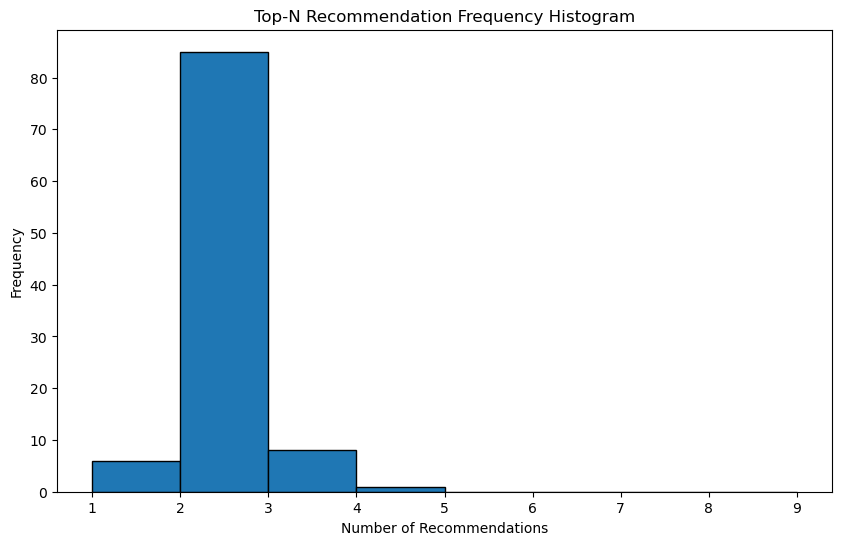

In [340]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_recommended_sorted['count'], bins=range(1, 10), edgecolor="k")
plt.title("Top-N Recommendation Frequency Histogram")
plt.xlabel("Number of Recommendations")
plt.ylabel("Frequency")
plt.show()

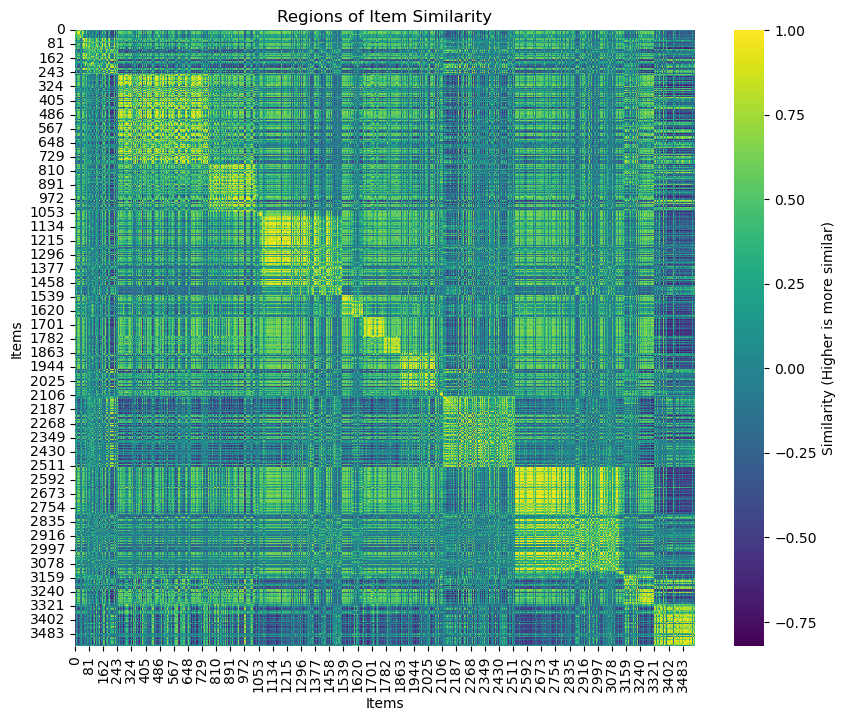

In [338]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix
similarity_matrix = cosine_similarity(X_train)  # X is the catalog feature matrix

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='viridis', cbar_kws={'label': 'Similarity (Higher is more similar)'})
plt.title("Regions of Item Similarity")
plt.xlabel("Items")
plt.ylabel("Items")
plt.show()

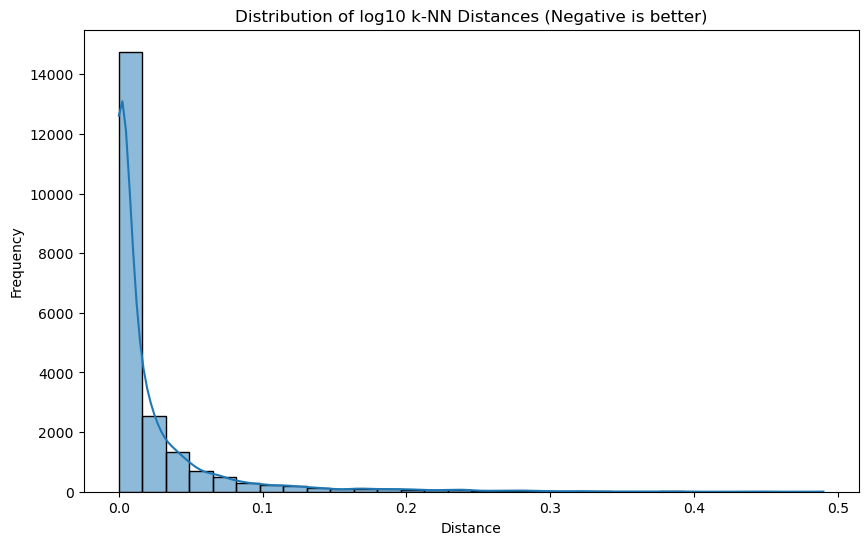

C:\Users\noahc\AppData\Local\Temp\ipykernel_16420\1000271611.py:13: RuntimeWarning: divide by zero encountered in log10
  flattened_distances = np.log10(distances.flatten())


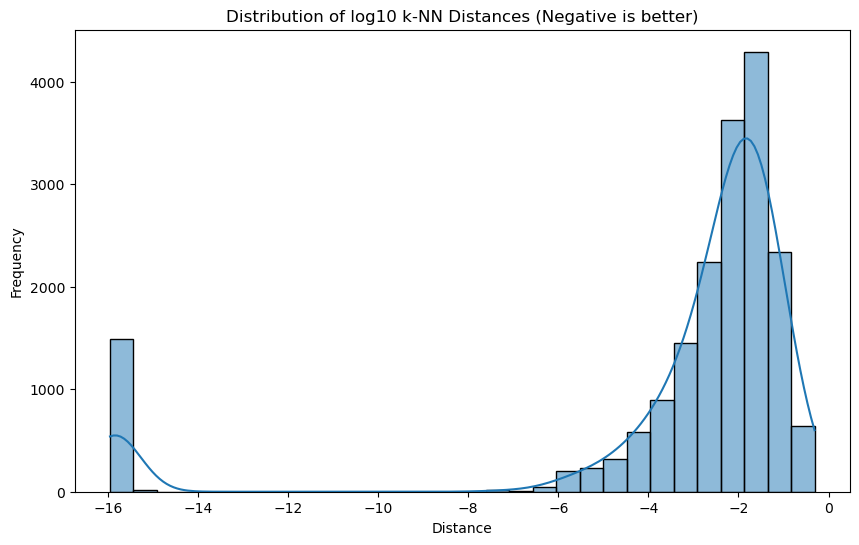

In [342]:

flattened_distances = distances.flatten()
#flattened_distances = distances.flatten()


# Plot distribution of distances
plt.figure(figsize=(10, 6))
sns.histplot(flattened_distances, kde=True, bins=30)
plt.title("Distribution of log10 k-NN Distances (Negative is better)")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

flattened_distances = np.log10(distances.flatten())
#flattened_distances = distances.flatten()
# Plot distribution of distances
plt.figure(figsize=(10, 6))
sns.histplot(flattened_distances, kde=True, bins=30)
plt.title("Distribution of log10 k-NN Distances (Negative is better)")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()

**Insights:**
- Reducing the dimensionality of the data set was very important. Without it the distances between the items would become quite meaningless, and therefore leading to bad recommendations. Although the similarities are still close, for our purposes it will suffice.
- The regions of similarity are related to the index, as can be seen on the heatmap. The similarity regions close to the diagonal are quite large, highlighting the similarity of items within the same category.
- We can see in the first histogram of distances that many items are close to zero. This has to do with the high dimensionality. When we investigate the distances on a log10 scale there is a clear distinction between similar items and items that are dissimilar, which supports our claim that we can make decent recommendations.
- Recommendations can only be evaluated using surveys.